In [263]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc

from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
from __future__ import print_function

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [238]:
dt = pd.read_csv('data_after_preproc_dummies_#3.csv')

In [360]:
temp = dt.copy()

In [439]:
train_ID = dt[dt.SalePrice.notnull()]['Id']
test_ID = dt[dt.SalePrice.isnull()]['Id']

train_x = dt[dt.SalePrice.notnull()].drop(['SalePrice', 'logSalePrice', 'Id'], 1)
train_y = dt[dt.SalePrice.notnull()].logSalePrice
test_x = dt[dt.SalePrice.isnull()].drop(['SalePrice', 'logSalePrice', 'Id'], 1)

In [ ]:
# standardize
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(dt)

In [256]:
test_x.head()

,Id,LotFrontage,LotArea,Street,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,MSSubClass_1 story 1946+,MSSubClass_1 story PUD 1946+,MSSubClass_1 story unf attic,"MSSubClass_1,5 story PUD all","MSSubClass_1,5 story fin","MSSubClass_1,5 story unf",MSSubClass_2 family conversion,MSSubClass_2 story 1945-,MSSubClass_2 story 1946+,MSSubClass_2 story PUD 1946+,"MSSubClass_2,5 story all ages",MSSubClass_PUD multilevel,MSSubClass_duplex all style/age,MSSubClass_split foyer,MSSubClass_split/multi level,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_1,Electrical_2,Electrical_3,Electrical_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_CWD,SaleCondition_Con,SaleCondition_ConLD,SaleCondition_ConLI,SaleCondition_ConLw,SaleCondition_New,SaleCondition_Oth,SaleCondition_WD
1458,1461,80.000000,11622,1,1,0,5,6,1961,1961,0.000000,3,3,3,3,1,3,468.000000,2,144.000000,270.000000,882.000000,5,3,1,896,0,0,896,0.000000,0.000000,1,0,2,1,3,5,7,0,0,1961.000000,1,1.000000,730.000000,3,3,2,140,0,0,0,120,0,0,0,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

### 1. The Lasso

In [242]:
lassocv = linear_model.LassoCV(normalize=True, cv=10, verbose=True)
lassocvfit = lassocv.fit(train_x, train_y)
lassocv_score = lassocv.score(train_x, train_y)
lassocv_alpha = lassocv.alpha_
#print('CV', lassocv.coef_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [243]:
print("Best lambda: ", lassocvfit.alpha_)
print("R2: ", lassocvfit.score(train_x, train_y))
print("RMSE: ", np.sqrt(mean_squared_error(train_y, lassocvfit.predict(train_x))))
print("MAE: ", mean_absolute_error(train_y, lassocvfit.predict(train_x)))

Best lambda:  0.0001059715584021914
R2:  0.9284688869994757
RMSE:  0.10686842583854908
MAE:  0.07467629542362793


In [325]:
coef = pd.concat([pd.DataFrame(train_x.columns), pd.DataFrame(lassocv.coef_)], 1)
coef.columns = ['variable', 'coef']

In [326]:
coef['abs(coef)'] = np.abs(coef.coef)

In [200]:
coef.sort_values('abs(coef)', ascending=False)

,variable,coef,abs(coef)
145,Exterior1st_BrkComm,-0.128113,0.128113
88,Neighborhood_Crawfor,0.099425,0.099425
138,RoofMatl_Membran,0.073027,0.073027
104,Neighborhood_StoneBr,0.070786,0.070786
92,Neighborhood_MeadowV,-0.070027,0.070027
2,Street,0.067839,0.067839
64,MSSubClass_2 story PUD 1946+,-0.059889,0.059889
5,OverallQual,0.057443,0.057443
146,Exterior1st_BrkFace,0.052565,0.052565
215,SaleType_New,0.052428,0.052428


In [365]:
coef.sort_values('abs(coef)', ascending=False).to_csv('Lasso_coeff.csv')

#### LassoLars

In [11]:
import sklearn.datasets
import sklearn.cross_validation as cv
from sklearn import linear_model

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [214]:
lassoLarsCV = linear_model.LassoLarsCV(cv=10, normalize=True)
lassLarsCVfit = lassoLarsCV.fit(train_x, train_y)
#dict(zip(train_x.columns, lassLarsCVfit.coef_)).to_frame()

In [215]:
print("Best lambda: ", lassLarsCVfit.alpha_)
print("R2: ", lassLarsCVfit.score(train_x, train_y))
print("RMSE: ", np.sqrt(mean_squared_error(train_y, lassLarsCVfit.predict(train_x))))
print("MAE: ", mean_absolute_error(train_y, lassLarsCVfit.predict(train_x)))
#print(r2_score(train_y, lassLarsCVfit.predict(train_x)))


Best lambda:  0.00011606514631416946
R2:  0.9279712161950067
RMSE:  0.10723954482271579
MAE:  0.0748324357022955


### 1.2. Ridge

In [372]:
ridgecv = linear_model.RidgeCV(normalize=True, cv=10)
ridgecvfit = ridgecv.fit(train_x, train_y)
lidgecv_score = ridgecv.score(train_x, train_y)
ridgecv_alpha = ridgecv.alpha_
#print('CV', ridgecv.coef_)

In [373]:
print("Best lambda: ", lassocvfit.alpha_)
print("R2: ", lassocvfit.score(train_x, train_y))
print("RMSE: ", np.sqrt(mean_squared_error(train_y, lassocvfit.predict(train_x))))
print("MAE: ", mean_absolute_error(train_y, lassocvfit.predict(train_x)))

Best lambda:  0.0001059715584021914
R2:  0.9284688869994757
RMSE:  0.10686842583854908
MAE:  0.07467629542362793


### 1.3. ElasticNet

In [247]:
L1_ratio_grid = np.linspace(0.07, 0.072, 15)

for i in L1_ratio_grid:
    elastic = linear_model.ElasticNetCV(cv=10, normalize=True, l1_ratio = i)
    elastic.fit(train_x, train_y)
    print("\nL1_ratio: ", i)
    print("Best lambda: ", elastic.alpha_)
    print("R2: ", elastic.score(train_x, train_y))
    print("RMSE: ", np.sqrt(mean_squared_error(train_y, elastic.predict(train_x))))
    print("MAE: ", mean_absolute_error(train_y, elastic.predict(train_x)))

# Best L1 ratio: L1_ratio:  0.07185714285714286
    #Best lambda:  0.00011962178676897253
    #R2:  0.9337585578513259
    #RMSE:  0.10284112302858019
    #MAE:  0.07159423322458407


L1_ratio:  0.07
Best lambda:  0.00012279542600978193
R2:  0.9336067252810162
RMSE:  0.10295891707237641
MAE:  0.07167769800861289

L1_ratio:  0.07014285714285715
Best lambda:  0.0001225453334924504
R2:  0.9336186808904923
RMSE:  0.10294964661517066
MAE:  0.07167116325725988

L1_ratio:  0.07028571428571428
Best lambda:  0.00012229625761136828
R2:  0.93363059371952
RMSE:  0.10294040849981259
MAE:  0.07166464296726595

L1_ratio:  0.07042857142857144
Best lambda:  0.00012204819218010781
R2:  0.9336424644832261
RMSE:  0.10293120218037213
MAE:  0.07165813688488805

L1_ratio:  0.07057142857142858
Best lambda:  0.00012180113106233432
R2:  0.9336542926559733
RMSE:  0.10292202807309199
MAE:  0.07165164529659224

L1_ratio:  0.07071428571428572
Best lambda:  0.00012155506817129929
R2:  0.9336660788540104
RMSE:  0.10291288570855127
MAE:  0.07164516796213183

L1_ratio:  0.07085714285714285
Best lambda:  0.00012130999746934115
R2:  0.9336778232961649
RMSE:  0.10290377492544688
MAE:  0.07163873010616

In [250]:
elastic = linear_model.ElasticNetCV(cv=10, normalize=True, l1_ratio = 0.07185714285714286)
elastic.fit(train_x, train_y) # fit model
#elastic.coef_, elastic.intercept_ # coefficients

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.07185714285714286, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=True, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [251]:
print("Best lambda: ", elastic.alpha_)
print("R2: ", elastic.score(train_x, train_y))
print("RMSE: ", np.sqrt(mean_squared_error(train_y, elastic.predict(train_x))))
print("MAE: ", mean_absolute_error(train_y, elastic.predict(train_x)))

Best lambda:  0.00011962178676897253
R2:  0.9337585578513259
RMSE:  0.10284112302858019
MAE:  0.07159423322458407


## 2. Tree Models

### 2.1. Decision tree

In [257]:
3, minfrom sklearn.tree import DecisionTreeRegressor

In [301]:
tree = DecisionTreeRegressor(splitter='best', max_depth=10, min_samples_leaf=5)
tree.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [302]:
feat_list = train_x.columns
feat_list

Index(['LotFrontage', 'LotArea', 'Street', 'LandContour', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_CWD', 'SaleCondition_Con',
       'SaleCondition_ConLD', 'SaleCondition_ConLI', 'SaleCondition_ConLw',
       'SaleCondition_New', 'SaleCondition_Oth', 'SaleCondition_WD'],
      dtype='object', length=226)

In [303]:
tree_imp = pd.Series(index = feat_list, data = tree.feature_importances_)

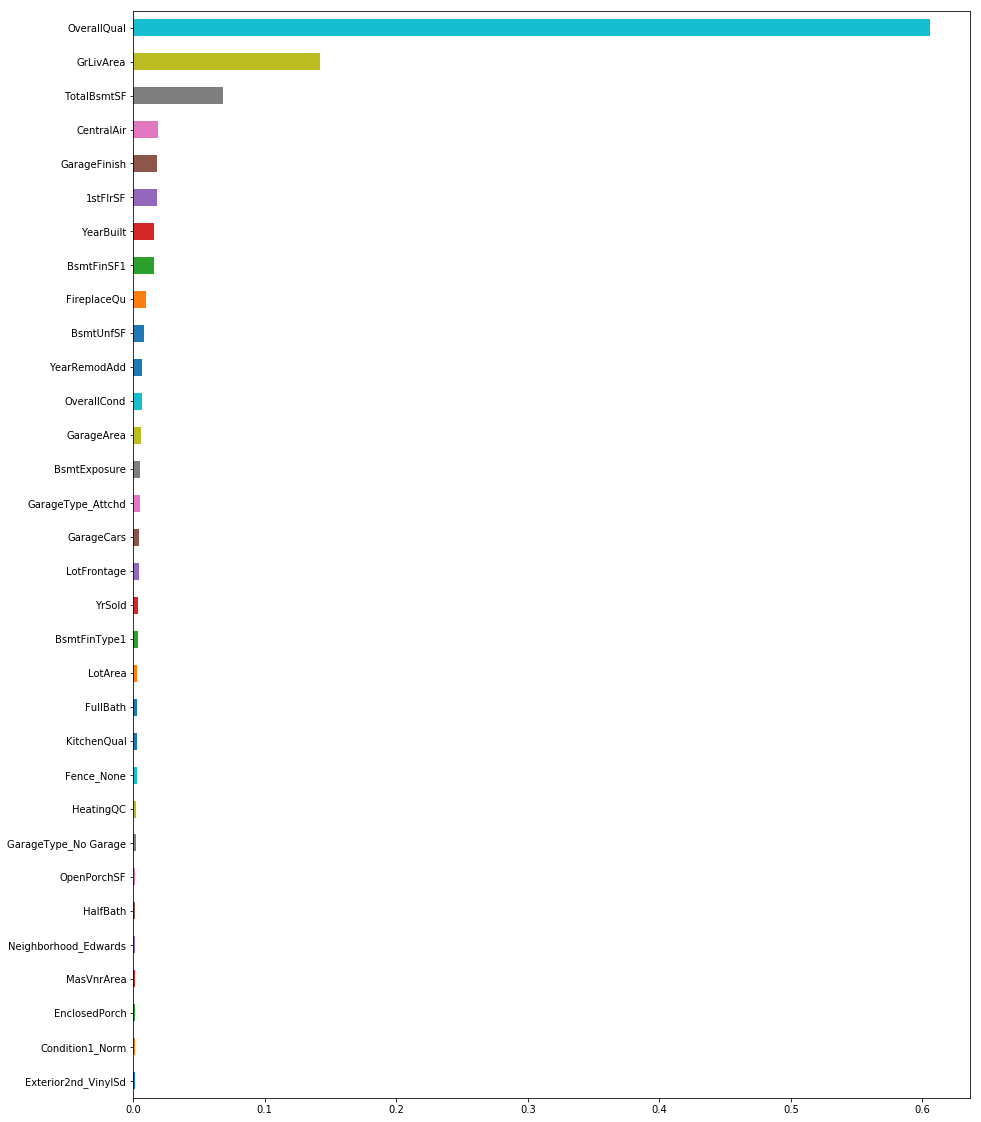

In [304]:
#A neat way to visualize your feature importance!
tree_imp = pd.Series(index = feat_list, data = tree.feature_importances_)

fig = plt.figure(figsize=(15, 20))
tree_imp[tree_imp > 0.001].sort_values().plot(kind = 'barh')

In [306]:
np.set_printoptions(suppress=False)
print("R2: ", tree.score(train_x, train_y))
print("RMSE: ", np.sqrt(mean_squared_error(train_y, tree.predict(train_x))))
print("MAE: ", mean_absolute_error(train_y, tree.predict(train_x)))

R2:  0.9406971618337545
RMSE:  0.09730600900543106
MAE:  0.06795517316841725


In [317]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)  
#treefit = tree.fit(X_train, y_train)
#tree.score(X_test, y_test)

In [316]:
scores = cross_val_score(tree, train_x, train_y, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

[0.76571416 0.8319117  0.8119783  0.80696865 0.81643006 0.81417549
 0.8091205  0.82634416 0.82751462 0.80239408]
0.8112551700380205
0.01769181672689895


### 2.2. RandomForest

In [318]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
scores = cross_val_score(rf, train_x, train_y, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

[0.82669079 0.87349459 0.89525104 0.87086488 0.86268302 0.8837151
 0.84947778 0.88001689 0.87804771 0.83646777]
0.8656709573260125
0.020715150323500037


### 2.3. Gradient Boosintg

In [319]:
gb = GradientBoostingRegressor()
scores = cross_val_score(gb, train_x, train_y, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

[0.87831784 0.92703413 0.92305407 0.89553681 0.89266954 0.9079927
 0.89321526 0.92161834 0.92309891 0.87508186]
0.9037619452649459
0.01842912134451178


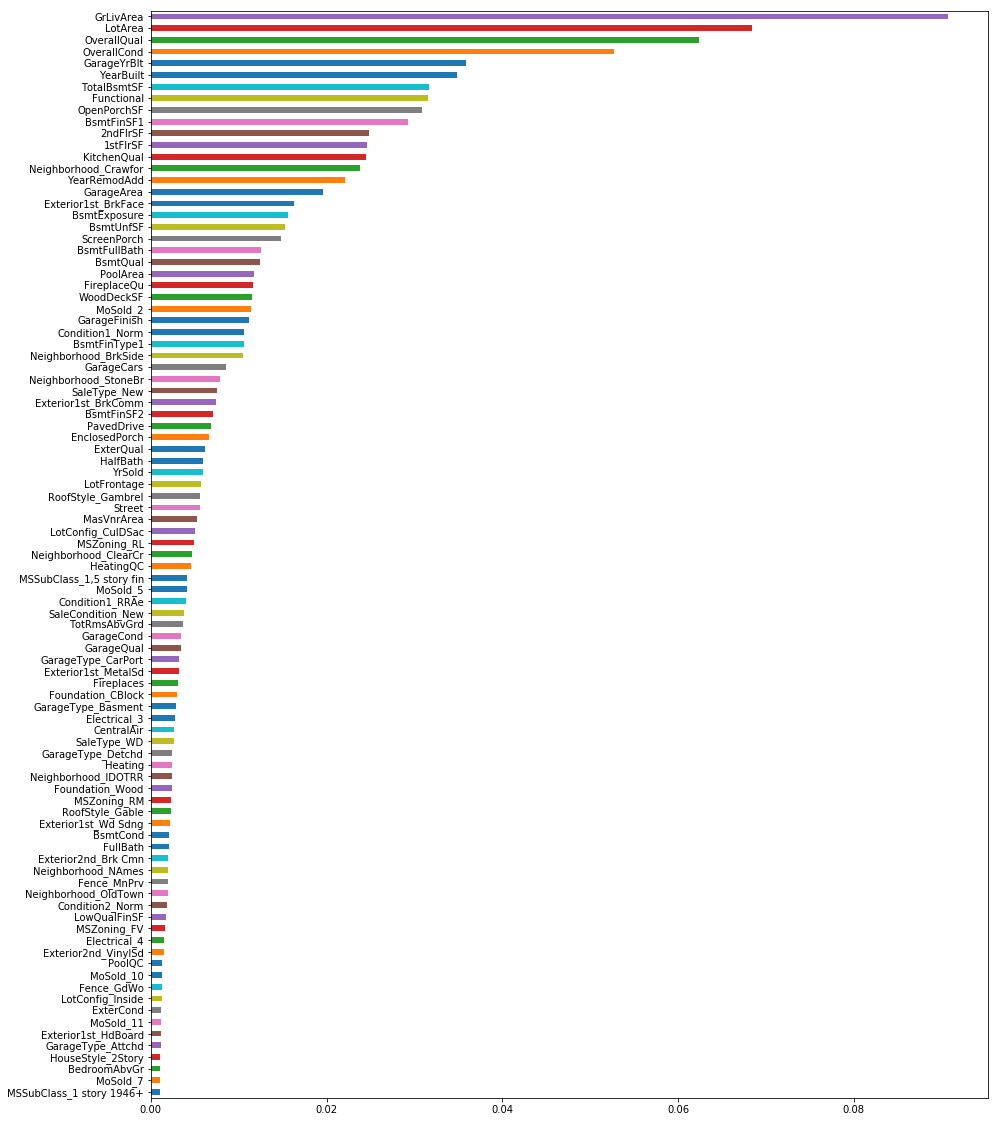

In [339]:
gb.fit(train_x, train_y)
gb_imp = pd.Series(index = feat_list, data = gb.feature_importances_)

fig = plt.figure(figsize=(15, 20))
gb_imp[gb_imp > 0.001].sort_values().plot(kind = 'barh')

In [464]:
# using lasso's important variables
imp_features_nm = coef.variable[coef.coef != 0]

In [465]:
gb2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
scores = cross_val_score(gb2, train_x[imp_features_nm], train_y, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

KeyboardInterrupt: 

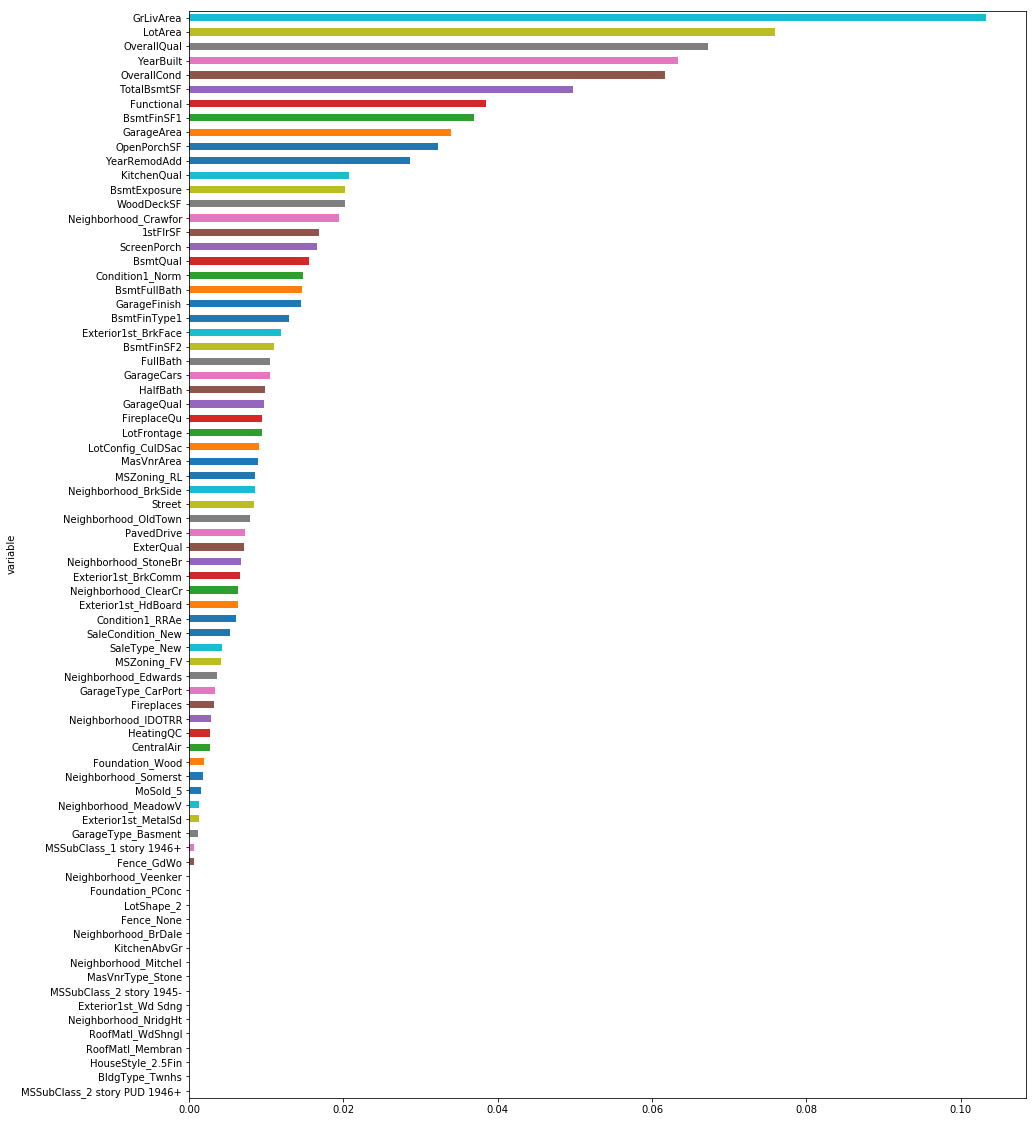

In [359]:
gb2.fit(train_x[imp_features_nm], train_y)
gb_imp = pd.Series(index = imp_features_nm, data = gb.feature_importances_)

fig = plt.figure(figsize=(15, 20))
gb_imp[gb_imp >=0].sort_values().plot(kind = 'barh')

In [367]:
gb_imp.to_csv('gb_imp.csv')

## 3. Stacking

In [401]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [412]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [413]:

stk_lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0001059715584021914, random_state=1))
stk_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.00011962178676897253, l1_ratio= 0.07185714285714286, random_state=3))
#stk_KRR = KernelRidge(alpha = 0.06, kernel='polynomial', degree=2, coef0=2.5)
stk_ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.0001059715584021914, random_state=1))
stk_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
stk_model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200, 
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,  nthread = -1)

                         
#random_state =7,

In [414]:
score = rmsle_cv(stk_lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1140 (0.0133)



In [415]:
score = rmsle_cv(stk_ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1178 (0.0138)



In [416]:
score = rmsle_cv(stk_ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge score: 0.1218 (0.0138)



In [417]:
#score = rmsle_cv(stk_KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [418]:
score = rmsle_cv(stk_GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1128 (0.0143)



In [419]:
score = rmsle_cv(stk_model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1158 (0.0139)



In [420]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [421]:
averaged_models = AveragingModels(models = (stk_ENet, stk_GBoost, stk_ridge, stk_lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1110 (0.0137)



In [430]:
train_x.columns

Index(['LotFrontage', 'LotArea', 'Street', 'LandContour', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_CWD', 'SaleCondition_Con',
       'SaleCondition_ConLD', 'SaleCondition_ConLI', 'SaleCondition_ConLw',
       'SaleCondition_New', 'SaleCondition_Oth', 'SaleCondition_WD'],
      dtype='object', length=226)

In [433]:
test_x = test_x.drop('Id', 1)

In [435]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [443]:
averaged_models.fit(train_x, train_y)
train_pred= averaged_models.predict(train_x)
train_pred_val = np.expm1(averaged_models.predict(test_x))
print("RMSE: ", rmsle(train_y, train_pred))

RMSE:  0.0810694426431622


In [454]:
stk_GBoost.fit(train_x, train_y)
xgb_train_pred= stk_GBoost.predict(train_x)
xgb_pred_val = np.expm1(stk_GBoost.predict(test_x))
print("RMSE: ", rmsle(train_y, xgb_train_pred))

RMSE:  0.05199099820145197


In [ ]:
ensemble = train_pred_val*0.7 + xgb_pred_val*0.3  # leaderboard 0.12196

In [461]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('result11_xgb_0.7.csv',index=False)

In [364]:
# Kaggle result
pd.concat([pd.DataFrame(test_x.Id).reset_index()['Id'], \
           pd.DataFrame(np.exp(gb2.predict(test_x)))], ignore_index=True, axis=1).to_csv('result7_gb.csv', index=False, header = ['Id', 'SalePrice'])